<a href="https://colab.research.google.com/github/kteymouri/intro-ml-course-winter2025/blob/main/Assignment_2__significant_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:

# Read the dataset into a Pandas DataFrame
df = pd.read_csv ("/content/Datathon #2 Heart Failure Mortality.csv")

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,hf_mortality
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
description = df.describe()
description
# no significant missing data found in the dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,hypertension,platelets,serum_creatinine,serum_sodium,sex,smoking,time,hf_mortality
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# taking out all the features with P>0.05 in the previous analysis with all features included
df = df.drop(['anaemia', 'hypertension','creatinine_phosphokinase', 'diabetes','platelets','serum_sodium','sex','smoking'], axis=1)

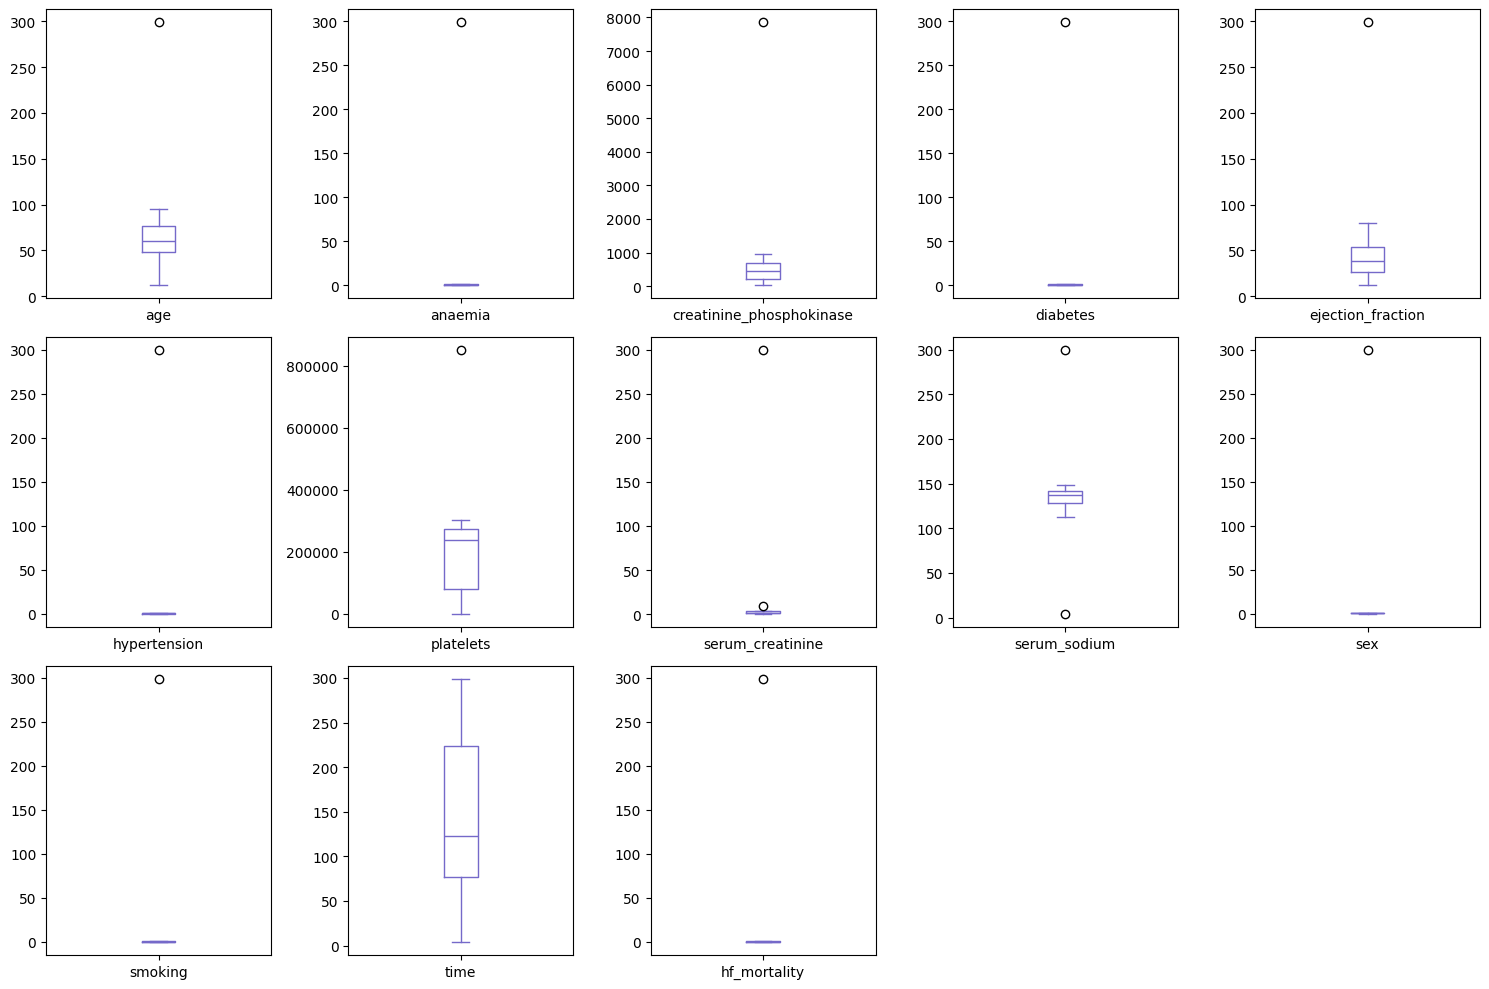

In [ ]:
# Visual representation of df.describe()
description.plot(kind='box', subplots=True, layout=(3, 5), figsize=(15, 10), color='#7569c9')
plt.tight_layout()
plt.show()

In [ ]:
print(df.isnull().sum()) #no missing value

age                  0
ejection_fraction    0
serum_creatinine     0
time                 0
hf_mortality         0
dtype: int64


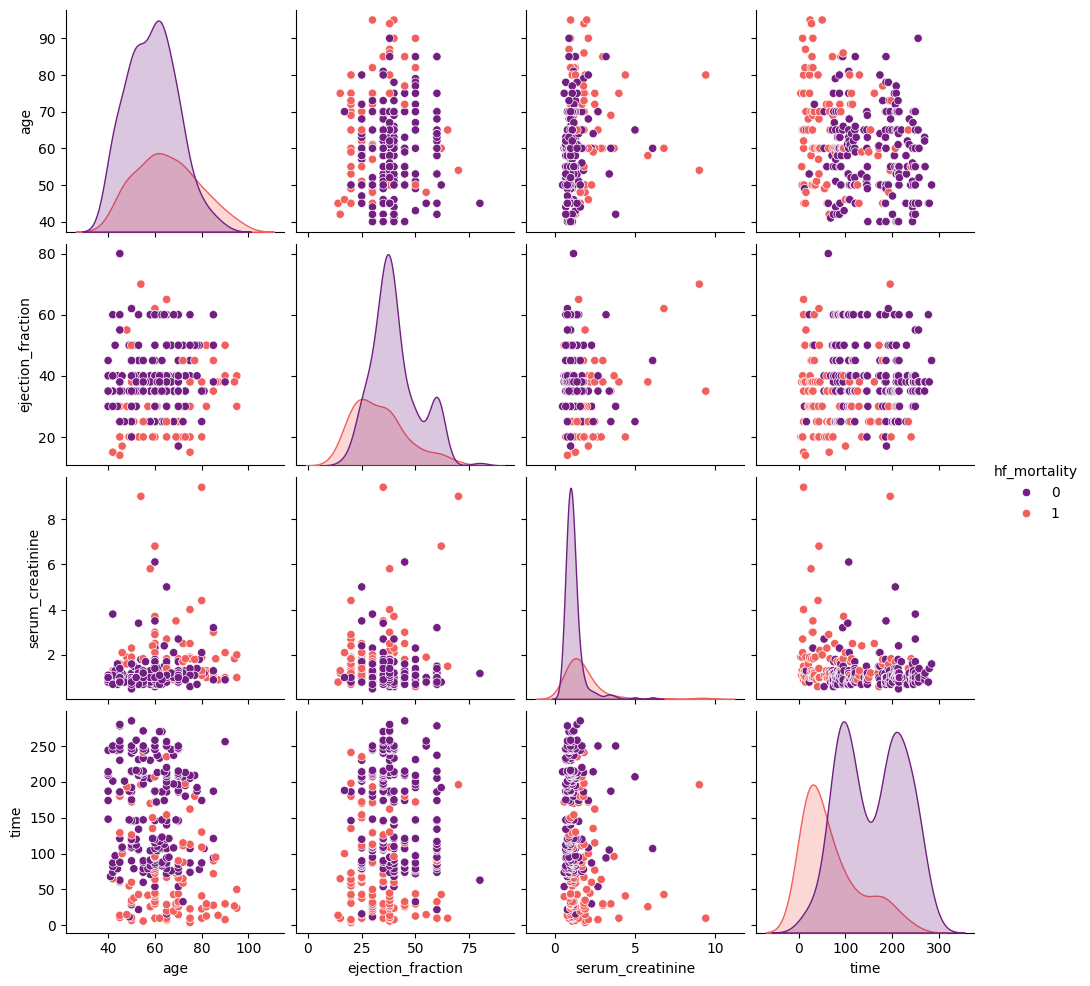

In [ ]:
# Display pair plot for data visualization
sns.pairplot(df, hue='hf_mortality', palette="magma")
plt.show()

In [ ]:
# Split the data into features and target variable
X = df.drop('hf_mortality', axis=1)
y = df['hf_mortality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

In [ ]:
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[33  2]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



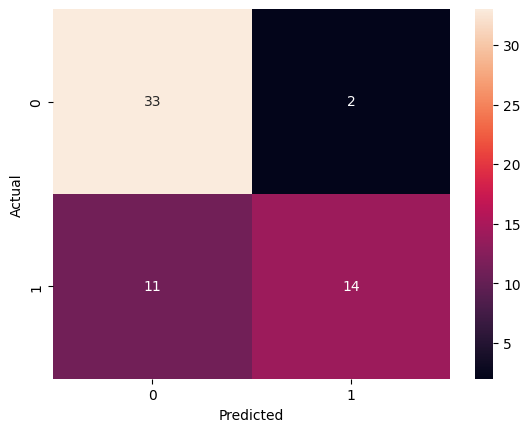

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

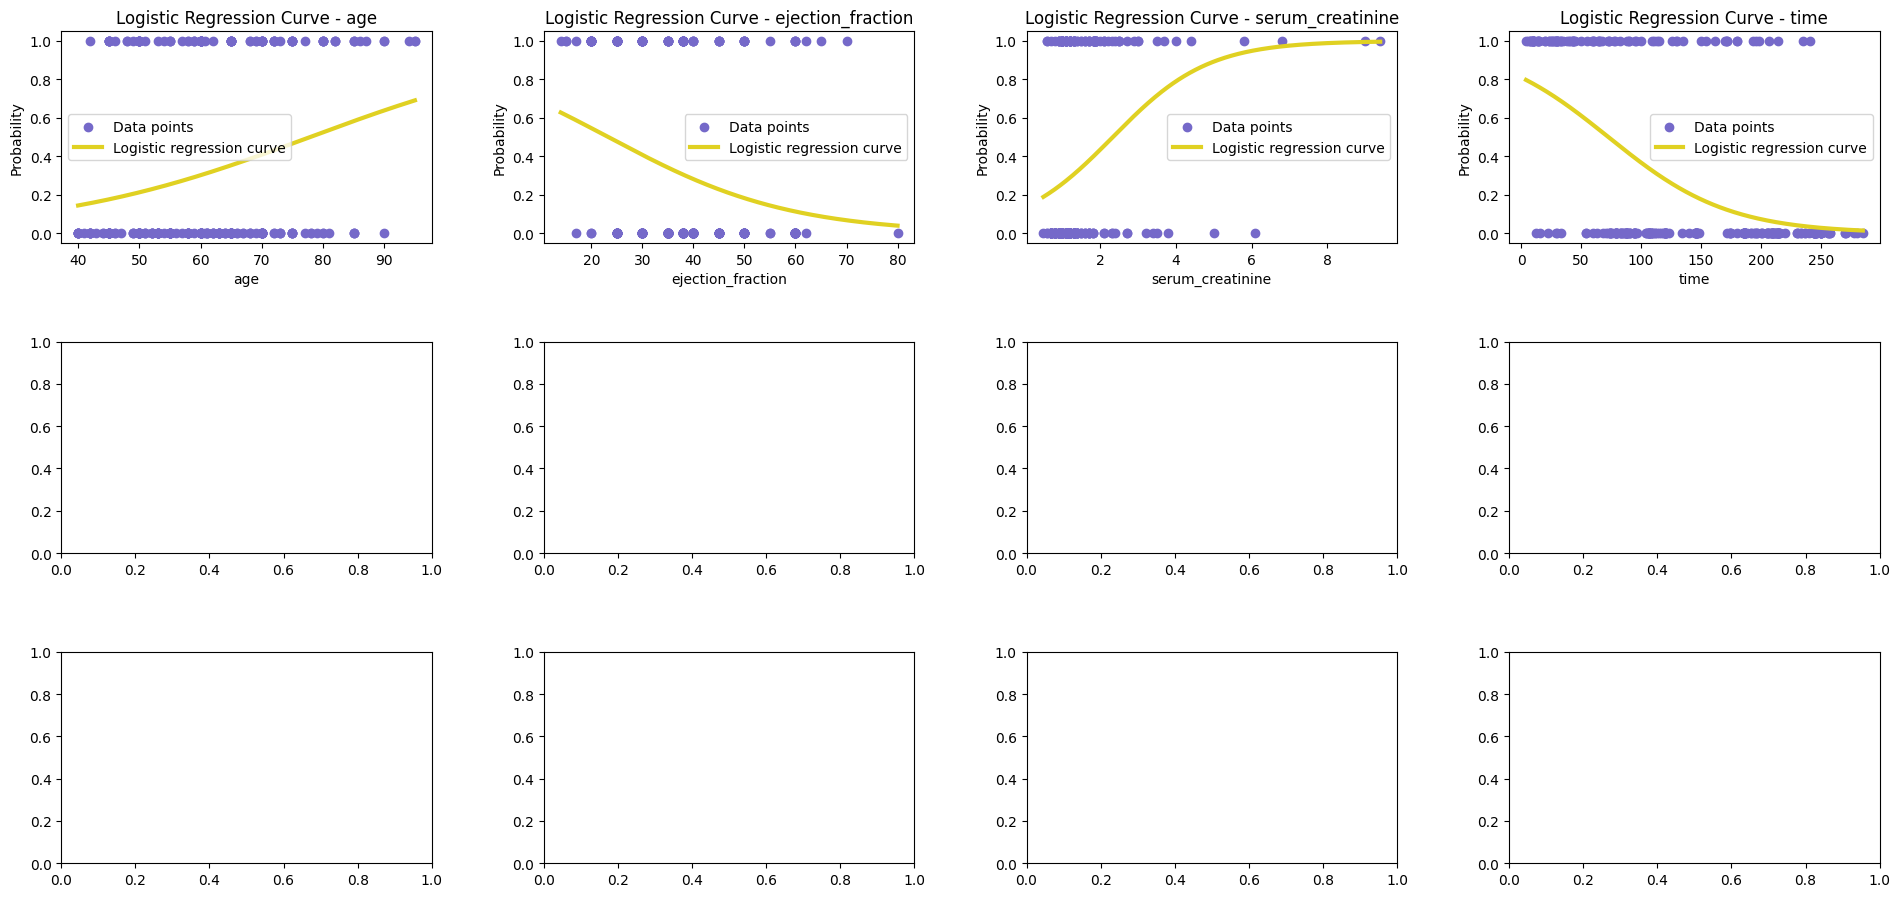

In [ ]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(3, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(df.columns[:-1]):  # Exclude 'Outcome' column
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = df[[feature]]
    y = df['hf_mortality']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

In [ ]:
import statsmodels.api as sm

# Separate features and target variable
X = df.drop('hf_mortality', axis=1)
y = df['hf_mortality']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.378430
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           hf_mortality   No. Observations:                  299
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            4
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.3971
Time:                        05:12:25   Log-Likelihood:                -113.15
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.257e-31
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6045      1.036      0.583      0.560      -1.426       2.635
age     